In [1]:
conda install statsmodels pandas matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/paolo/miniconda3/envs/SARIMA

  added / updated specs:
    - matplotlib
    - pandas
    - statsmodels


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.07.19 |       h06a4308_0         124 KB
    ------------------------------------------------------------
                                           Total:         124 KB

The following packages will be UPDATED:

  ca-certificates                      2022.4.26-h06a4308_0 --> 2022.07.19-h06a4308_0



ca-certificates-2022 | 124 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [40]:
import statsmodels.tsa.statespace as sps

     num_usr
0         70
1         48
2         45
3         38
4         35
..       ...
163      104
164      110
165      112
166      108
167       80

[168 rows x 1 columns]


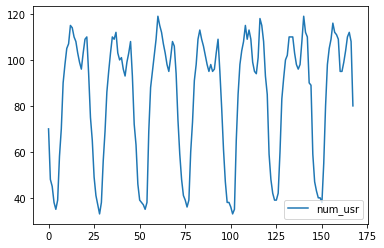

(168, 1)

In [112]:
from pandas import read_csv
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import numpy as np


series = read_csv('tesi/weekDist.csv',header=0,usecols = ['num_usr'])
#read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
print(series)
series.plot()
pyplot.show()
series.shape

                               SARIMAX Results                                
Dep. Variable:                num_usr   No. Observations:                  168
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -585.002
Date:                Sun, 24 Jul 2022   AIC                           1182.003
Time:                        16:10:44   BIC                           1200.711
Sample:                             0   HQIC                          1189.597
                                - 168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6139      0.091      6.772      0.000       0.436       0.792
ar.L2          0.1165      0.093      1.248      0.212      -0.066       0.299
ar.L3         -0.1355      0.127     -1.071      0.2

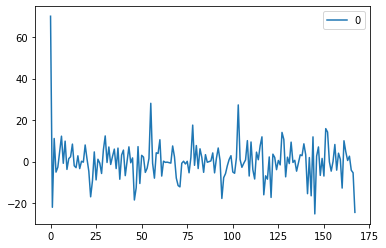

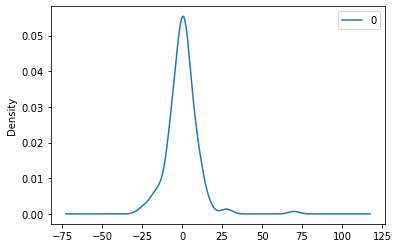

                0
count  168.000000
mean     0.331205
std      9.741871
min    -25.188981
25%     -4.593156
50%      0.275537
75%      4.082518
max     70.000000


In [113]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/tmp/ipykernel_3480/3319807758.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
/tmp/ipykernel_3480/3319807758.py:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


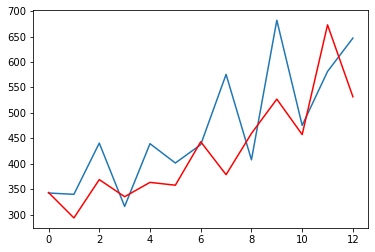

In [22]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('shampoo.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()